## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load and Prepare the Data

In [2]:
file_path = 'infolimpioavanzadoTarget.csv'   
data = pd.read_csv(file_path)

In [3]:
print(data.head())

         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [4]:
print(data.isnull().sum())

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


In [5]:
print(data.describe())

              open         high          low        close     adjclose  \
count  7781.000000  7781.000000  7781.000000  7781.000000  7781.000000   
mean     34.990220    35.655999    34.301243    34.964414    34.483147   
std      99.841502   101.451058    98.073945    99.790823    98.603879   
min       0.410000     0.435000     0.405000     0.408000     0.408000   
25%       4.050000     4.130000     3.980000     4.030000     3.960000   
50%      10.080000    10.110000    10.005000    10.080000    10.061000   
75%      24.350000    24.500000    24.080000    24.250000    22.466007   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  7.781000e+03    7316.000000  7316.000000    7006.000000  7006.000000   
mean   7.586022e+05      46.817434    49.814790      46.966016    49.898659   
std    3.934491e+06      11.672838     5.002664       8.760961     3.420371   
min    0.000000e+

## Exploratory Data Analysis (EDA)

### Historical Stock Prices

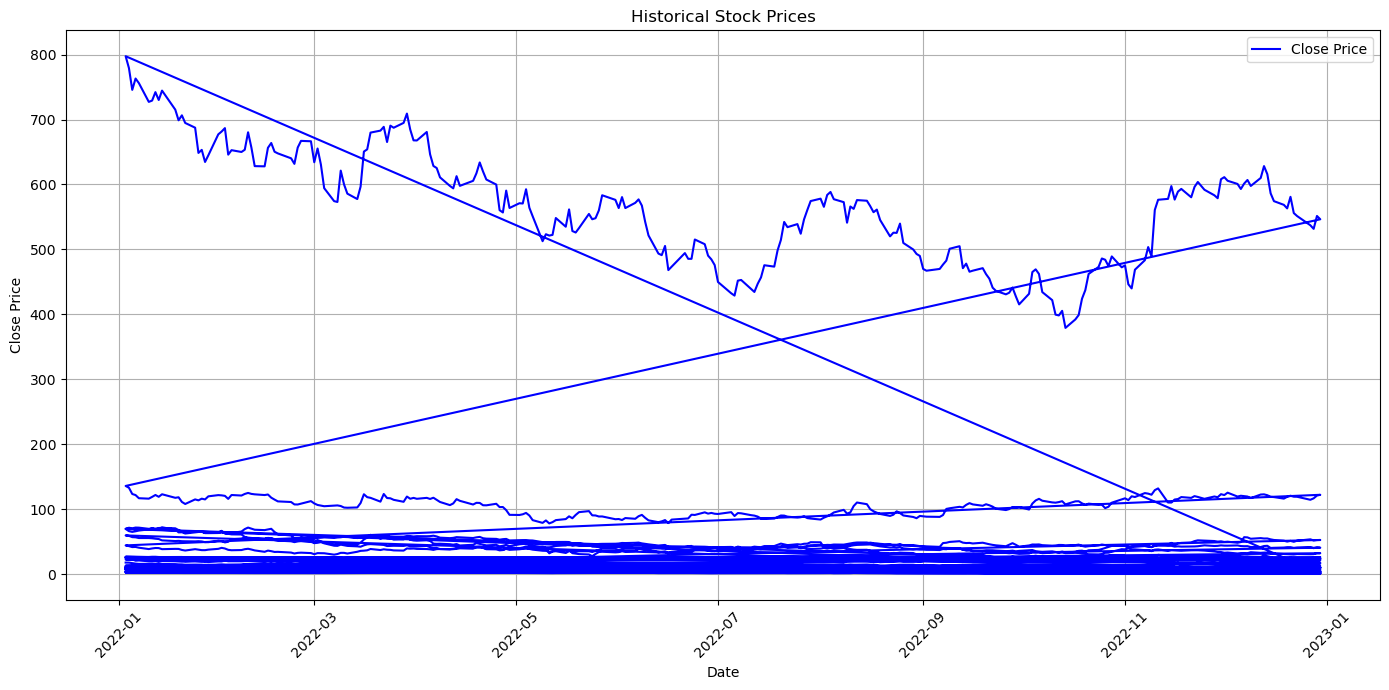

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical Stock Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

### Distribution of Close Prices

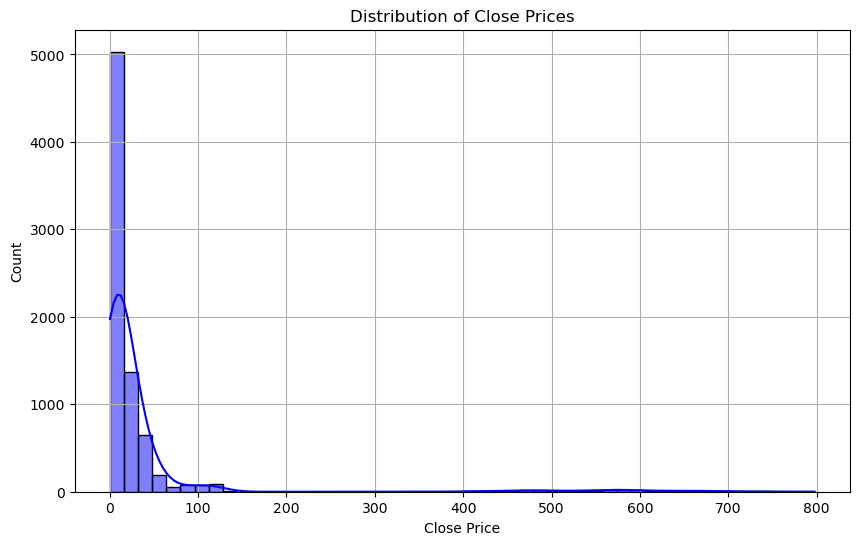

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['close'], bins=50, kde=True, color='blue')
plt.xlabel('Close Price')
plt.title('Distribution of Close Prices')
plt.grid(True)
plt.show()

### Daily Returns

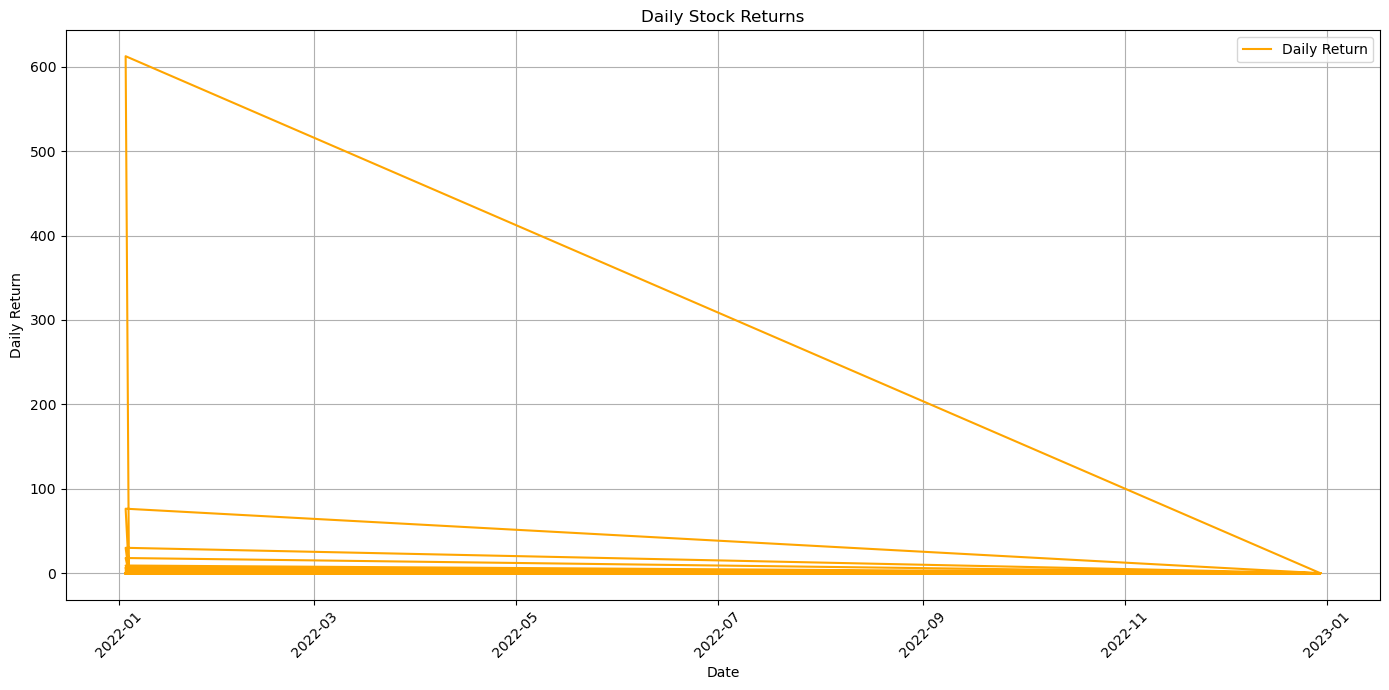

In [28]:
data['Daily Return'] = data['close'].pct_change()

plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['Daily Return'], label='Daily Return', color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Stock Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()   
plt.show()

### Moving Average

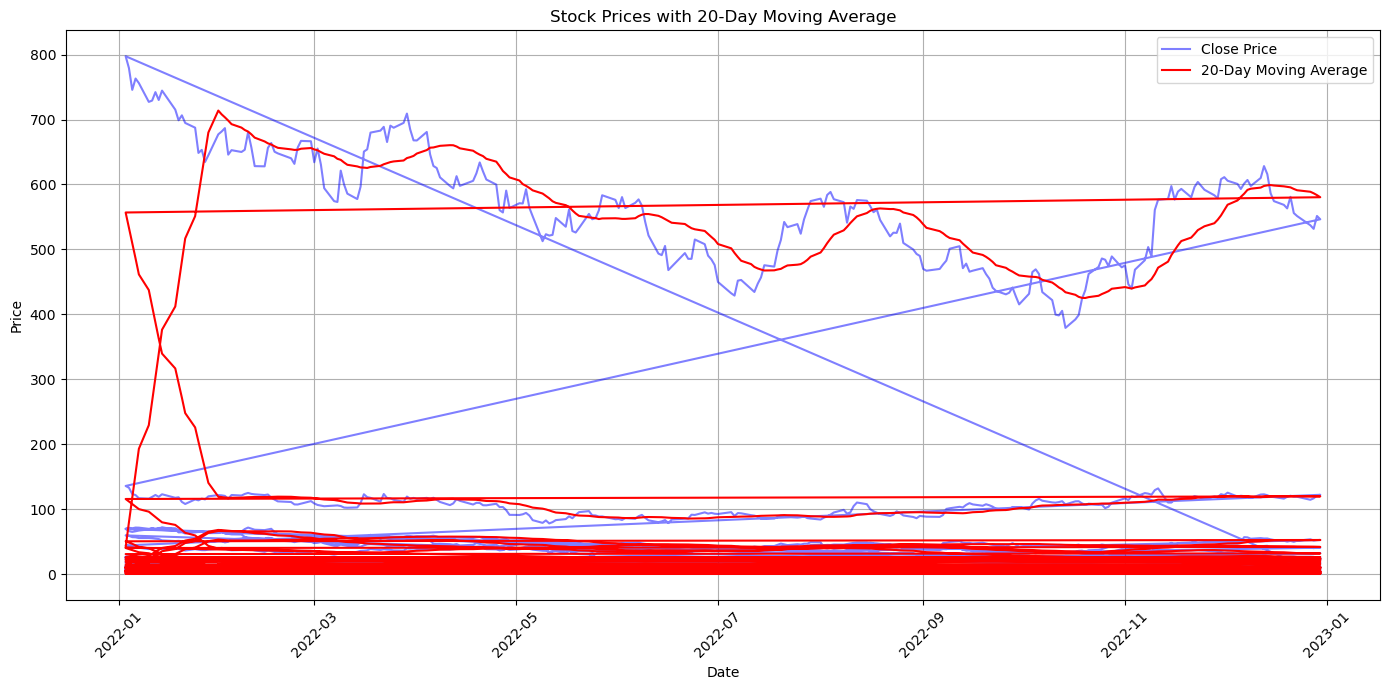

In [29]:
data['Moving Average'] = data['close'].rolling(window=20).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data['date'], data['Moving Average'], label='20-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices with 20-Day Moving Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)   
plt.tight_layout()   
plt.show()

### Actual vs Predicted Prices

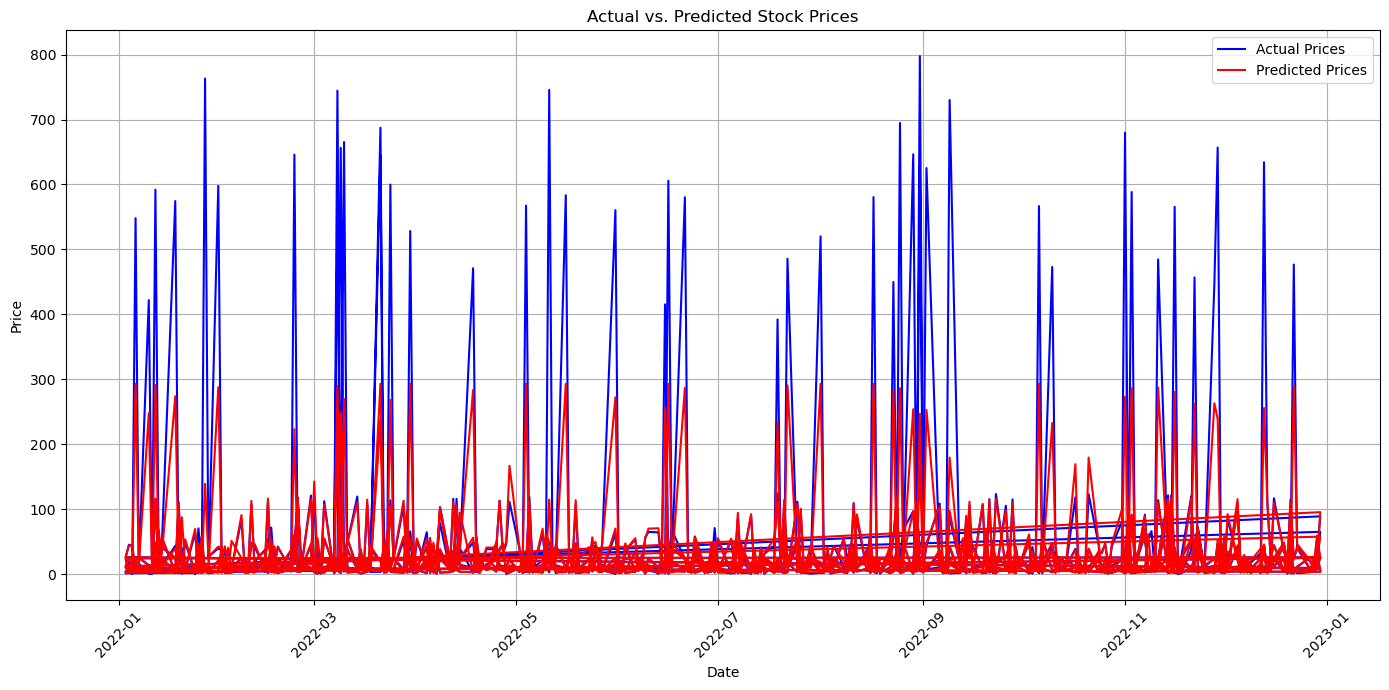

In [41]:
plt.figure(figsize=(14, 7))
plt.plot(data['date'].iloc[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data['date'].iloc[-len(y_test):], y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)   
plt.tight_layout()  
plt.show()

### Residuals Analysis

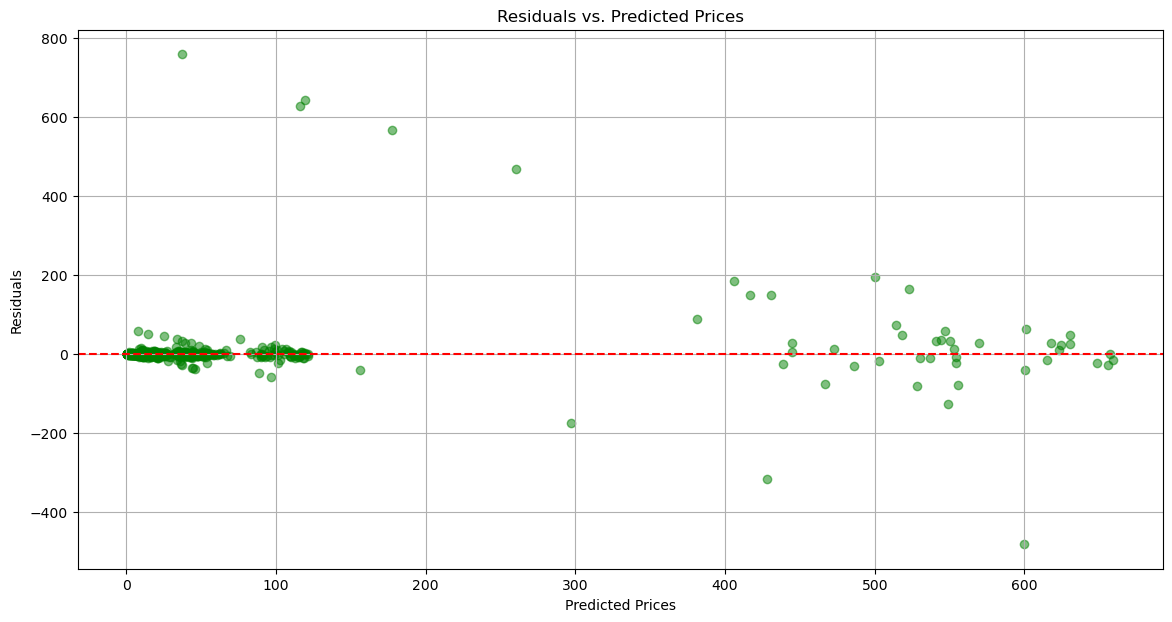

In [31]:
residuals = y_test - y_pred

plt.figure(figsize=(14, 7))
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.grid(True)
plt.show()

## Feature Engineering

In [32]:
data['date'] = pd.to_datetime(data['date'])
data['Daily Return'] = data['close'].pct_change()
data['Moving Average'] = data['close'].rolling(window=20).mean()

## Split the Data

In [33]:
combined_data = data[['Daily Return', 'Moving Average', 'close']].dropna()
X = combined_data[['Daily Return', 'Moving Average']]
y = combined_data['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [34]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

Linear Regression - MAE: 4.366958271940571, MSE: 863.7127229758307, R2: 0.9120755937559226
Decision Tree - MAE: 6.674890480172764, MSE: 2168.3297261267926, R2: 0.7792679224936969
Random Forest - MAE: 5.571407432997189, MSE: 1612.0245824861745, R2: 0.8358987884564022
SVR - MAE: 11.261383634861058, MSE: 3545.253348618909, R2: 0.6390995670549275


## Visualize Predictions 

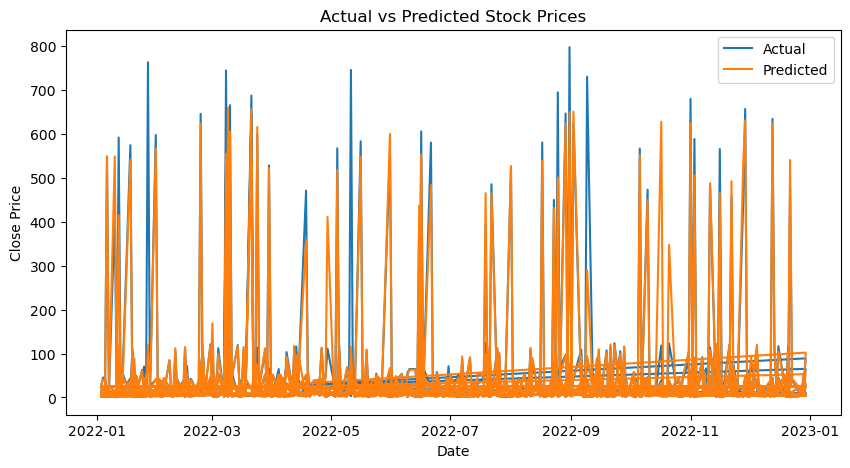

In [35]:
best_model = models['Random Forest']
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(data['date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(data['date'].iloc[-len(y_test):], y_pred_best, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost Mean Squared Error: {xgb_mse}')

XGBoost Mean Squared Error: 1710.2221492428635


## Model Tuning and Improvement

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Predict and evaluate with the tuned model
y_pred_tuned = best_rf_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Random Forest - MAE: {mae_tuned}, MSE: {mse_tuned}, R2: {r2_tuned}")


Tuned Random Forest - MAE: 5.643427009713427, MSE: 1644.8310027027417, R2: 0.8325591537123438
